<a href="https://colab.research.google.com/github/ruben9324/curso-series-temporales/blob/master/02Ejerciciopropuesto_ModuloTextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

--2022-05-29 17:47:49--  https://zenodo.org/record/4563995/files/profner.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46552748 (44M) [application/octet-stream]
Saving to: ‘profner.zip?download=1.2’

profner.zip?downloa 100%[===================>]  44.40M  14.3MB/s    in 3.1s    

2022-05-29 17:47:55 (14.3 MB/s) - ‘profner.zip?download=1.2’ saved [46552748/46552748]

Archive:  profner.zip?download=1
replace profner/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Funciones de carga y preparación de datos

In [3]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt 
    que se introduce en su entrada. 
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()
  
  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob). 
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [4]:
# Instalamos textacy
!pip install textacy
# Instalamos spacy y uno de sus modelos
!pip install spacy
# Descargamos modelos pre-entrenados de spacy.
#!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm



# Instalamos textacy
#!pip install textacy
#import textacy
# Instalamos spacy y uno de sus modelos
#!pip install spacy
# Descargamos modelos pre-entrenados de spacy.
# !python -m spacy download en_core_web_sm
#!python -m spacy download es_core_news_sm


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import spacy

# Cargamos el modelo preentrenado con textos en inglés ("en_core_web_sm")
# nlp=spacy.load("en_core_web_sm") #sm es la calidad del modelo de deep learning que está por detrás.
#nlp=spacy.load("es_core_news_sm") #sm es la calidad del modelo de deep learning que está por detrás.

from nltk.util import ngrams

import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk
from spacy import displacy
from nltk.corpus import wordnet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string 
import re 
import contractions 
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 4.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [5]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [6]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio

In [34]:
print("Tenemos un conjunto de {} documentos".format(len(datos_ejercicio)))
print("El dataframe tiene {} columnas".format(datos_ejercicio.shape[1]))

Tenemos un conjunto de 8000 documentos
El dataframe tiene 5 columnas


In [8]:
print("Existen {} noticias duplicadas".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))


Existen 0 noticias duplicadas


In [9]:
print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(datos_ejercicio.isnull())[0],
                                                                                                        np.sum(datos_ejercicio.isnull())[1]))

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos


In [10]:
print(datos_ejercicio["label"].value_counts())

0    6130
1    1870
Name: label, dtype: int64


Los datos están muy desbalanceados.

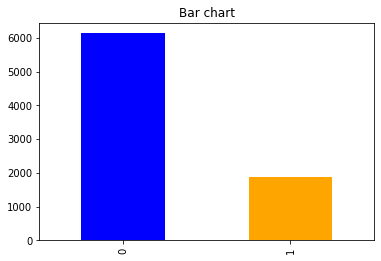

In [11]:
ax, fig = plt.subplots()
etiquetas = datos_ejercicio.label.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

Calculamos en una nueva columna del dataset la longitud del tweet.

In [36]:
datos_ejercicio["tweets_len"] = datos_ejercicio["tweet_text"].apply(lambda x:len(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


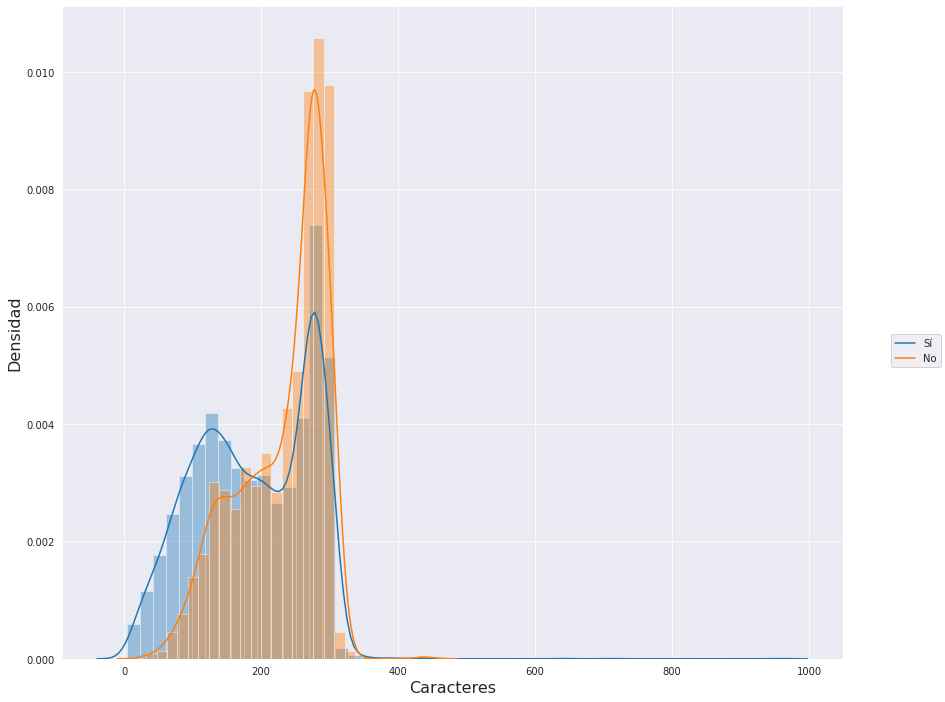

In [13]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la serie de tweets_len
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].tweets_len, hist=True, label="Sí")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio.label==1].tweets_len, hist=True, label="No")
fig.legend(labels=['Sí','No'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

In [38]:
datos_ejercicio[datos_ejercicio.label==1].sample(3).tweet_text.to_list()


[['madre',
  'despu',
  'año',
  'paro',
  'comenzar',
  'negocio',
  'justo',
  'covid',
  'mes',
  'ser',
  'horroroso',
  ',',
  'comenzar',
  'epocar',
  'co',
  'él',
  'remontar',
  ',',
  'costar',
  'no',
  'venir',
  'aqui',
  'fotocopia',
  'uni',
  'cualquiera',
  'cosa',
  ',',
  'tmbn',
  'traemos',
  'encargo',
  ':)',
  'https://t.co/ber1py3ksu'],
 ['mascarilla',
  'obligatorio',
  'kiwi',
  'moreno',
  'm',
  'doler',
  'pecho',
  'vez',
  'm',
  'dar',
  'pinchazo',
  'hacer',
  'mes',
  'd',
  'llevar',
  'puta',
  'mascarillo',
  'd',
  'mrda',
  'xd',
  'need',
  'ir',
  'medico',
  'x',
  'exención',
  'd'],
 ['primero',
  'ministro',
  'holandés',
  'ríe',
  'petición',
  'basurero',
  ':',
  'basurero',
  ':',
  '"',
  '¡',
  'des',
  'dinero',
  'español',
  '!',
  '"',
  'ministro',
  ':',
  '"',
  '¡',
  'recordar',
  '!',
  '"',
  '#',
  'covid',
  '#',
  'holanda',
  '#',
  'españa',
  '#',
  'coronavirus',
  '#',
  'covid',
  '19',
  'https://t.co/f3xvkykeh

In [39]:
datos_ejercicio[datos_ejercicio.label==0].sample(3).tweet_text.to_list()

[['sergio',
  'rar',
  'querido',
  'reunir',
  'él',
  'illa',
  'equipo',
  'científico',
  'dicho',
  'gobierno',
  'gestionado',
  'bien',
  'pandemiar',
  '.',
  'https://t.co/brlczronk9'],
 ['llevar',
  'mascarilla',
  'banderar',
  'españa',
  'diferenciar',
  'gilipolla',
  '.'],
 ['💙',
  'fin',
  'semana',
  'momento',
  'perfecto',
  'escuchar',
  'canción',
  "'",
  'aquí',
  "'",
  '@pabloalborar',
  '.',
  'beneficio',
  'canción',
  'versión',
  'destinar',
  '@unicef_es',
  'lucha',
  '#',
  'covid',
  '19',
  'vía',
  '@shareaholic',
  'https://t.co/0gqhcrllst']]

## 3. Preprocesado y Normalización

#### Transformamos a minúsculas
Así reducimos dimensionalidad

In [16]:
datos_ejercicio["tweet_text"] = datos_ejercicio["tweet_text"].apply(lambda x: x.lower()) 

In [17]:
datos_ejercicio["tweet_text"].iloc[0]

'china: libera una pandemia ee.uu: libera ovnis argentina: libera presos  jajajajajajaja'

#### Tokenizamos
Utilizando un tokenizador específico para TWITTER

In [18]:
from nltk.tokenize import TweetTokenizer
# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()#TweetTokenizer
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

In [19]:
datos_ejercicio["tweet_text"] = datos_ejercicio["tweet_text"].apply(lambda x: tokenize(x))

In [20]:
datos_ejercicio["tweet_text"].iloc[0]

['china',
 ':',
 'libera',
 'una',
 'pandemia',
 'ee.uu',
 ':',
 'libera',
 'ovnis',
 'argentina',
 ':',
 'libera',
 'presos',
 'jajajajajajaja']

#### Quitamos stopwords

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Quitar stop words de una lista de tokens
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
datos_ejercicio["tweet_text"] = datos_ejercicio["tweet_text"].apply(lambda x: quitar_stopwords(x))

In [23]:
datos_ejercicio["tweet_text"].iloc[0]

['china',
 ':',
 'libera',
 'pandemia',
 'ee.uu',
 ':',
 'libera',
 'ovnis',
 'argentina',
 ':',
 'libera',
 'presos',
 'jajajajajajaja']

#### Lematizamos

In [24]:
import es_core_news_sm
from tqdm import tqdm
tqdm.pandas()

# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
nlp = es_core_news_sm.load(disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens) #tokens
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

In [26]:
datos_ejercicio["tweet_text"] = datos_ejercicio["tweet_text"].progress_apply(lambda x: lematizar(x)) #lematizar

100%|██████████| 8000/8000 [00:33<00:00, 236.31it/s]


In [28]:
datos_ejercicio["tweet_text"].iloc[0]

'chino : libera pandemia ee.uu : liberar ovnis argentina : liberar presos jajajajajajaja'

## 4. Vectorización

In [50]:
!wget https://zenodo.org/record/1410403/files/keyed_vectors.zip?download=1
!unzip /content/keyed_vectors.zip?download=1

--2022-05-29 18:35:51--  https://zenodo.org/record/1410403/files/keyed_vectors.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2933030481 (2.7G) [application/octet-stream]
Saving to: ‘keyed_vectors.zip?download=1’

keyed_vectors.zip?d 100%[===================>]   2.73G  21.3MB/s    in 3m 39s  

2022-05-29 18:39:31 (12.8 MB/s) - ‘keyed_vectors.zip?download=1’ saved [2933030481/2933030481]

Archive:  /content/keyed_vectors.zip?download=1
  inflating: complete.kv             
  inflating: complete.kv.vectors.npy  


In [51]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load('complete.kv', mmap='r')

In [52]:
import multiprocessing
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
w2v_model = Word2Vec(min_count=20,
                     window=5,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20, 
                     workers=cores-1)

In [53]:
w2v_model.build_vocab(datos_ejercicio, progress_per=10000)

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

## 5. Entrenamiento y evaluación de modelos
